In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

In [2]:
movie_data=pd.read_csv("movieData.csv")
#movie_data=movie_data.dropna(axis='Runtime (min)')
movie_data=movie_data.dropna(subset=['Country','Genre'])

In [3]:
genres=[movie_data['Genre']]
genres.sort()
genres

[0         Biography, Crime, Drama
 1        Action, Biography, Drama
 2          Documentary, Biography
 3           Drama, Musical, Sport
 4                           Drama
                   ...            
 9342             Biography, Drama
 9352                  Documentary
 9366           Documentary, Short
 9370    Adventure, Comedy, Family
 9437            Adventure, Family
 Name: Genre, Length: 4362, dtype: object]

In [4]:
movie_data[['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7']]= genres[0].str.split(',',expand=True)
movie_data[['Country1','Country2','Country3','Country4','Country5','Country6','Country7','Country8','Country9','Country10','Country11','Country12','Country13','Country14','Country15']]=movie_data['Country'].str.split(',',expand=True)

In [5]:
movie_data[['Runtime','min']]=movie_data['Runtime'].str.split('m',n=1,expand=True)

In [6]:
movie_data['Rotten Tomatoes']=movie_data['Rotten Tomatoes'].str.rstrip("%")
movie_data['Rotten Tomatoes']=movie_data['Rotten Tomatoes'].str.replace('/100',"")

In [7]:
movie_data['Imdb']= movie_data['Imdb'].astype(float)
movie_data['Imdb']=movie_data['Imdb']*10

In [8]:

movie_datadf= pd.DataFrame({ 
                           "Title": movie_data['Title'],
                           "Year":movie_data['Year'].astype(int),
                           "Netflix":movie_data['Netflix'],
                           "Hulu":movie_data['Hulu'],
                           'Prime Video':movie_data['Prime Video'],
                           'Disney+':movie_data['Disney+'],
                           'Rating':movie_data['Rating'],
                           'Genre1':movie_data['Genre1'],
                           'Genre2':movie_data['Genre2'],
                           'Genre3':movie_data['Genre3'],
                           'Metascore':movie_data['Metascore'].astype(float),
                           'Imdb':movie_data['Imdb'],
                           'Rotten Tomatoes':movie_data['Rotten Tomatoes'].astype(float),
                           'Runtime':movie_data['Runtime'].astype(float),
                           'Country1':movie_data['Country1'],
                           'Country2':movie_data['Country2'],
                           'Country3':movie_data['Country3'],
                           'Country4':movie_data['Country4'],
                           'Country5':movie_data['Country5'],
                           
                            })


movie_datadf

,Title,Year,Netflix,Hulu,Prime Video,Disney+,Rating,Genre1,Genre2,Genre3,Metascore,Imdb,Rotten Tomatoes,Runtime,Country1,Country2,Country3,Country4,Country5
0,The Irishman,2019,1,0,0,0,R,Biography,Crime,Drama,94.0,78.0,95.0,209.0,United States,None,None,None,None
1,Dangal,2016,1,0,0,0,Not Rated,Action,Biography,Drama,NaN,83.0,88.0,161.0,India,United States,None,None,None
2,David Attenborough: A Life on Our Planet,2020,1,0,0,0,PG,Documentary,Biography,None,72.0,89.0,96.0,83.0,United Kingdom,None,None,None,None
3,Lagaan: Once Upon a Time in India,2001,1,0,0,0,PG,Drama,Musical,Sport,84.0,81.0,95.0,224.0,India,United States,United Kingdom,None,None
4,Roma,2018,1,0,0,0,R,Drama,None,None,96.0,77.0,96.0,135.0,Mexico,United States,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9342,Walt & El Grupo,2008,0,0,0,1,PG,Biography,Drama,None,NaN,59.0,17.0,107.0,United States,None,None,None,None
9352,Own the Room,2021,0,0,0,1,TV-PG,Documentary,None,None,68.0,65.0,100.0,91.0,United States,None,None,None,None
9366,Sacred Planet,2004,0,0,0,1,G,Documentary,Short,None,53.0,60.0,58.0,40.0,Canada,Malaysia,United States,None,None
9370,Unidentified Flying Oddball,1979,0,0,0,1,G,Adventure,Comedy,Family,66.0,51.0,66.0,93.0,United States,None,None,None,None


In [9]:
#distribution by decade of each streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

movie_datadf['Decade']=pd.cut(movie_datadf['Year'],size_bins, labels=group_names, right=False)

#movie_count_decade=movie_datadf.groupby('Decade').agg({'Netflix':['sum'],'Prime Video':['sum'],'Hulu':['sum'],'Disney+':['sum']})
movie_count_decade = movie_datadf.groupby(["Decade"]).sum()[["Netflix", "Prime Video", "Hulu", "Disney+"]]
movie_count_decade

,Netflix,Prime Video,Hulu,Disney+
Decade,,,,
Before 1980,12,213,23,64
1980-1989,16,86,26,22
1990-1999,52,142,51,79
2000-2009,150,329,112,121
2010-2022,1363,933,605,154


In [10]:
#print(movie_count_decade.transpose())

In [11]:
#moviepivot=pd.DataFrame(movie_count_decade.transpose())
#moviepivot

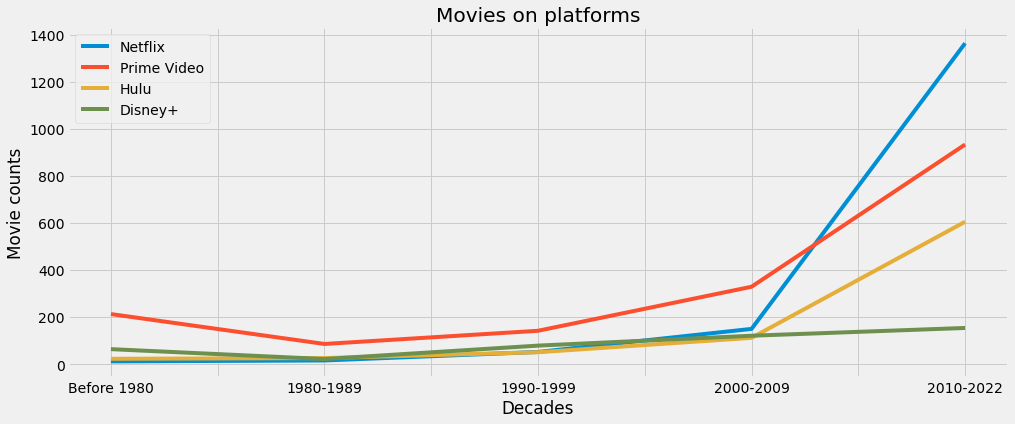

In [12]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax=movie_count_decade.plot(figsize=(15,6))
# Add a title
ax.set_title("Movies on platforms")
#  Add a x- and y-axis label.
ax.set_xlabel("Decades")
ax.set_ylabel("Movie counts")
#plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()

In [13]:
#make a new data for scores only
score=movie_datadf[['Year',"Netflix", "Prime Video", "Hulu", "Disney+",'Metascore','Imdb','Rotten Tomatoes']]

#add average score to the data
cols=['Metascore','Imdb','Rotten Tomatoes']

score['Avg. score'] = round(score[cols].mean(axis=1))


scoreAvg=score[["Year","Netflix", "Prime Video", "Hulu", "Disney+","Avg. score"]]

netflix_scoreAvg=scoreAvg[scoreAvg['Netflix']>0]
netflix_scoreAvg=netflix_scoreAvg[['Year','Netflix','Avg. score']]

prime_scoreAvg=scoreAvg[scoreAvg['Prime Video']>0]
prime_scoreAvg=prime_scoreAvg[['Year','Prime Video','Avg. score']]

hulu__scoreAvg=scoreAvg[scoreAvg['Hulu']>0]
hulu__scoreAvg=hulu__scoreAvg[['Year','Hulu','Avg. score']]

disney__scoreAvg=scoreAvg[scoreAvg['Disney+']>0]
disney__scoreAvg=disney__scoreAvg[['Year','Disney+','Avg. score']]

netflix_scoreAvg

C:\Users\jarvi\AppData\Local\Temp/ipykernel_47792/1511631786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['Avg. score'] = round(score[cols].mean(axis=1))


,Year,Netflix,Avg. score
0,2019,1,89.0
1,2016,1,86.0
2,2020,1,86.0
3,2001,1,87.0
4,2018,1,90.0
...,...,...,...
3605,2017,1,68.0
3610,2019,1,77.0
3620,2018,1,46.0
3632,2021,1,54.0


In [14]:
#distribution by decade of Netflix streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

netflix_scoreAvg['Decade']=pd.cut(netflix_scoreAvg['Year'],size_bins, labels=group_names, right=False)

netflix_scoreAvgdf=netflix_scoreAvg.groupby(["Decade"]).agg({"Netflix":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score":"Netflix Avg. score"})

netflix_scoreAvgdf

,Netflix,Netflix Avg. score
Decade,,
Before 1980,12,82.333333
1980-1989,16,63.562500
1990-1999,52,59.903846
2000-2009,150,60.960000
2010-2022,1363,63.317682


In [15]:
#distribution by decade of Prime Video streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

prime_scoreAvg['Decade']=pd.cut(prime_scoreAvg['Year'],size_bins, labels=group_names, right=False)

prime_scoreAvgdf=prime_scoreAvg.groupby(["Decade"]).agg({"Prime Video":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score":"Prime Video Avg. score"})

prime_scoreAvgdf

,Prime Video,Prime Video Avg. score
Decade,,
Before 1980,213,71.924883
1980-1989,86,58.941860
1990-1999,142,56.492958
2000-2009,329,56.465046
2010-2022,933,58.071811


In [16]:
#distribution by decade of Hulu streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

hulu__scoreAvg['Decade']=pd.cut(hulu__scoreAvg['Year'],size_bins, labels=group_names, right=False)

hulu__scoreAvgdf=hulu__scoreAvg.groupby(["Decade"]).agg({"Hulu":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score": "Hulu Avg. score"})

hulu__scoreAvgdf

,Hulu,Hulu Avg. score
Decade,,
Before 1980,23,67.869565
1980-1989,26,64.961538
1990-1999,51,58.705882
2000-2009,112,55.241071
2010-2022,605,63.920661


In [17]:
#distribution by decade of Disney+ streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

disney__scoreAvg['Decade']=pd.cut(disney__scoreAvg['Year'],size_bins, labels=group_names, right=False)

disney__scoreAvgdf=disney__scoreAvg.groupby(["Decade"]).agg({"Disney+":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score": "Disney+ Avg. score"})

disney__scoreAvgdf

,Disney+,Disney+ Avg. score
Decade,,
Before 1980,64,68.468750
1980-1989,22,65.909091
1990-1999,79,54.835443
2000-2009,121,58.322314
2010-2022,154,69.227273


In [18]:
#merge the avg. score for all platform
complete_scoreAvg1=pd.merge(netflix_scoreAvgdf,prime_scoreAvgdf, how="inner",on="Decade")

complete_scoreAvg2=pd.merge(hulu__scoreAvgdf,disney__scoreAvgdf, how="inner",on="Decade")

complete_scoreAvg=pd.merge(complete_scoreAvg1,complete_scoreAvg2, how="inner",on="Decade")

complete_scoreAvg=complete_scoreAvg[['Netflix Avg. score','Prime Video Avg. score','Hulu Avg. score','Disney+ Avg. score']]

complete_scoreAvg.round()


,Netflix Avg. score,Prime Video Avg. score,Hulu Avg. score,Disney+ Avg. score
Decade,,,,
Before 1980,82.0,72.0,68.0,68.0
1980-1989,64.0,59.0,65.0,66.0
1990-1999,60.0,56.0,59.0,55.0
2000-2009,61.0,56.0,55.0,58.0
2010-2022,63.0,58.0,64.0,69.0


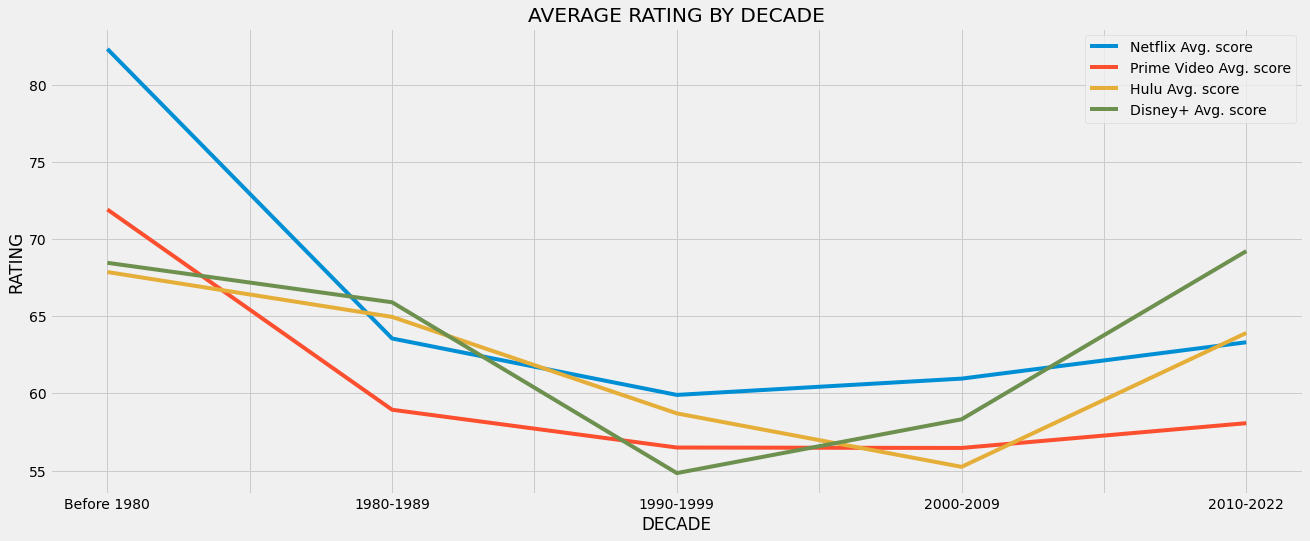

In [24]:
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax=complete_scoreAvg.plot(figsize=(20,8))
# Add a title
ax.set_title("AVERAGE RATING BY DECADE")
#  Add a x- and y-axis label.
ax.set_xlabel("DECADE")
ax.set_ylabel("RATINGS")
#plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()